In [1]:
import pandas as pd
import app as app
import function1 as fc
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier 

In [2]:
file_name="NCI.csv"
file_path="data/"+file_name
data = df = pd.read_csv(file_path)

arr1 = app.getFrequencyOfFeatureByPercent(df, 20, 1, 50)
arr5 = app.getFrequencyOfFeatureByPercent(df, 20, 5, 50)
arr10 = app.getFrequencyOfFeatureByPercent(df, 20, 1, 50)

In [3]:
print("RF 100%")
acc_RF_100= fc.buildRFwithAllFeature(df, 20)

print("-------------")
print("RF 1%")
acc_RF_1= fc.buildRFwithArrFeature(df, 20, arr1)

print("-------------")
print("RF 5%")
acc_RF_5=fc.buildRFwithArrFeature(df, 20, arr5)

print("-------------")
print("RF 10%")
acc_RF_10 = fc.buildRFwithArrFeature(df, 20, arr10)


print("-------------")
print("SVM 100%")
acc_SVM_100 = fc.buidSVMAllFeature(df, 20)

print("-------------")
print("SVM 1%")
acc_SVM_1 = fc.buidSVMSSelectedFeature(df, 20, arr1)

print("-------------")
print("SVM 5%")
acc_SVM_5 = fc.buidSVMSSelectedFeature(df, 20, arr5)

print("-------------")
print("SVM 10%")
acc_SVM_10 = fc.buidSVMSSelectedFeature(df, 20, arr10)

print("-------------")
print("NB 100%")
acc_NB_100 = fc.buidNaivebayesAllFeature(df, 20)

print("-------------")
print("NB 1%")
acc_NB_1 = fc.buidNaivebayesSelectedFeature(df, 20, arr1)

print("-------------")
print("NB 5%")
acc_NB_5 = fc.buidNaivebayesSelectedFeature(df, 20, arr5)

print("-------------")
print("NB 10%")
acc_NB_10 = fc.buidNaivebayesSelectedFeature(df, 20, arr10)


dataRF = []
dataRF.append(acc_RF_100)
dataRF.append(acc_RF_10)
dataRF.append(acc_RF_5)
dataRF.append(acc_RF_1)


dataSVM = [];
dataSVM.append(acc_SVM_100)
dataSVM.append(acc_SVM_10)
dataSVM.append(acc_SVM_5)
dataSVM.append(acc_SVM_1)

dataNB = [];
dataNB.append(acc_NB_100)
dataNB.append(acc_NB_10)
dataNB.append(acc_NB_5)
dataNB.append(acc_NB_1)

RF 100%
Gia tri trung binh
0.5894736842105263
Do lech chuan
0.09055079228465922
-------------
RF 1%
Gia tri trung binh
0.7552631578947369
Do lech chuan
0.09005230859088774
-------------
RF 5%
Gia tri trung binh
0.7605263157894737
Do lech chuan
0.1283552462974442
-------------
RF 10%
Gia tri trung binh
0.7421052631578945
Do lech chuan
0.07964603131800818
-------------
SVM 100%
Gia tri trung binh
0.5052631578947369
Do lech chuan
0.11697953037312037
-------------
SVM 1%
Gia tri trung binh
0.5973684210526315
Do lech chuan
0.09455391696432464
-------------
SVM 5%
Gia tri trung binh
0.6236842105263157
Do lech chuan
0.14535752083833134
-------------
SVM 10%
Gia tri trung binh
0.6842105263157895
Do lech chuan
0.09846466807299846
-------------
NB 100%
Gia tri trung binh
0.35526315789473684
Do lech chuan
0.11871309019621012
-------------
NB 1%
Gia tri trung binh
0.5236842105263159
Do lech chuan
0.1436321478841599
-------------
NB 5%
Gia tri trung binh
0.5131578947368421
Do lech chuan
0.141102701

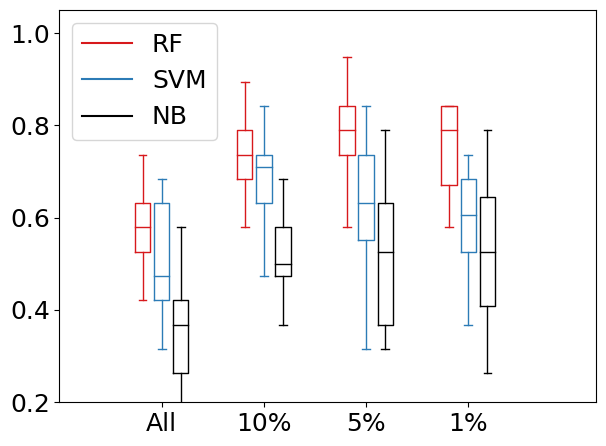

In [5]:
import matplotlib.pyplot as plt
import numpy as np

ticks = ['All', '10%', '5%', '1%']

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
    
plt.figure()
# plt.suptitle(file_name)
bpRF = plt.boxplot(dataRF, positions=np.array(range(len(dataRF)))*4-0.75, sym='', widths=0.6)
bpSVM = plt.boxplot(dataSVM, positions=np.array(range(len(dataSVM)))*4, sym='', widths=0.6)
bpNB = plt.boxplot(dataNB, positions=np.array(range(len(dataNB)))*4+0.75, sym='', widths=0.6)

# setting colors for each groups
define_box_properties(bpRF, '#D7191C', 'RF')
define_box_properties(bpSVM, '#2C7BB6', 'SVM')
define_box_properties(bpNB, '#000000', 'NB')


plt.legend()
plt.rcParams.update({'font.size': 18})
plt.xticks(range(0, len(ticks) *4, 4), ticks)
plt.xlim(-4, len(ticks)*2+9)
plt.ylim(0.2, 1.05)
plt.tight_layout() 

In [5]:
# Ghi file RF
dataRF = [];
dataRF.append([file_name, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, "TB"])
x=[100]
x.extend(acc_RF_100)
x.append(np.mean(acc_RF_100))
dataRF.append(x)

x1=[1]
x1.extend(acc_RF_1)
x1.append(np.mean(acc_RF_1))
dataRF.append(x1)
x5=[5]
x5.extend(acc_RF_5)
x5.append(np.mean(acc_RF_5))
dataRF.append(x5)
x10=[10]
x10.extend(acc_RF_10)
x10.append(np.mean(acc_RF_10))
dataRF.append(x10)

In [6]:
import openpyxl

def output_Excel(input_detail, output_excel_path, fileCSV):
    # Xác định số hàng và cột lớn nhất trong file excel cần tạo
    row = 22
    column = 5

    # Tạo một workbook mới và active nó
    wb = openpyxl.load_workbook(output_excel_path)
    wb.create_sheet(fileCSV)
    sheet = wb[fileCSV]
    #   ws = wb.active

    # Dùng vòng lặp for để ghi nội dung từ input_detail vào file Excel
    for i in range(0, column):
        for j in range(0, row):
            v = input_detail[i][j]
            sheet.cell(row=j + 1, column=i + 1, value=v)

    # Lưu lại file Excel
    wb.save(output_excel_path)

In [7]:
output_excel_path= './result/ketquaRF.xlsx'
output_Excel(dataRF,output_excel_path, file_name)

In [8]:
# Ghi file SVM
dataSVM = [];
dataSVM.append([file_name, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, "TB"])
x=[100]
x.extend(acc_SVM_100)
x.append(np.mean(acc_SVM_100))
dataSVM.append(x)
x=[1]
x.extend(acc_SVM_1)
x.append(np.mean(acc_SVM_1))
dataSVM.append(x)
x=[5]
x.extend(acc_SVM_5)
x.append(np.mean(acc_SVM_5))
dataSVM.append(x)
x=[10]
x.extend(acc_SVM_10)
x.append(np.mean(acc_SVM_10))
dataSVM.append(x)
output_excel_path= './result/ketquaSVM.xlsx'
output_Excel(dataSVM,output_excel_path, file_name)

In [9]:
# Ghi file NB
dataNB = [];
dataNB.append([file_name, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, "TB"])
x=[100]
x.extend(acc_NB_100)
x.append(np.mean(acc_NB_100))
dataNB.append(x)
x=[1]
x.extend(acc_NB_1)
x.append(np.mean(acc_NB_1))
dataNB.append(x)
x=[5]
x.extend(acc_NB_5)
x.append(np.mean(acc_NB_5))
dataNB.append(x)
x=[10]
x.extend(acc_NB_10)
x.append(np.mean(acc_NB_10))
dataNB.append(x)
output_excel_path= './result/ketquaNB.xlsx'
output_Excel(dataNB,output_excel_path, file_name)